### Anomalies calculation
* This follows ESI idea. We set an accumulation window, let's say, 4 weeks (ws=5), then, for each DOY, we will have the historical average and stdev including the window dates. Finally, the anomalies are calculated based on the accumulated average and stdev.
* We just have to set the window, the folder and the nodata value.

In [31]:
import sys, os
sys.path.append("/home/wardlow/denis/mypy")
import xuleta as xu
from scipy.stats import *
from scipy import interpolate
from glob import glob
import numpy as np
import pylab as plt
plt.rcParams['image.cmap'] = 'RdYlGn'
%matplotlib inline

In [32]:
folder = "/work/wardlow/denis/PB/mcd15a2h/"
#gpp 32767, mxdET 0, mcd43a3 32767, lai >248
nodata = 248
ws = 5

#### WORK WITH DOY FORMAT

In [33]:
if ws%2 == 0:
    print('must be an odd number, we are setting 5 as default')
    ws = 5 
    
try:
    xu.renamedate(folder,oldf='%Y-%m-%d',newf='%Y-%j',wts=0)
    print('Filenames converted to DOY format')
except:
    print('Maybe the files are already in DOY format')


#################
if ws%2 == 0:
    print('must be an odd number')

#rename files to DOY format
#xu.renamedate(folder,oldf='%Y-%m-%d',newf='%Y-%j',wts=0)

# create the output folder for means, std and final result
fout = folder + 'out/'
fmeans = fout + 'means'
fstds = fout + 'stds'
fs = [fout, fmeans, fstds]
for i in fs:
    if not os.path.exists(i): os.makedirs(i)

#LIST OF FILES and list of names
lf = sorted(glob(folder+"*.tif"))
ln = xu.listfiles(folder,full=False)
print('Total of %d files, ready to start?' %len(lf))

#List of unique dates
days = sorted(list(set([ii[-7:-4] for n,ii in enumerate(ln) if ii not in ln[:n]])))

# create a list of extended dates (like a cycle) considering the chosen window
daysext = days[-int(ws/2):] + days + days[:int(ws/2)]

Done!
Filenames converted to DOY format
Total of 673 files, ready to start?


In [34]:
%%time
for i in range(int(ws/2),len(daysext)-int(ws/2)):
    cumdates = daysext[i-int(ws/2):i+int(ws/2)]
    print('processing '+ daysext[i])
    print(cumdates)
    toOpen = [x for x in lf if x[-7:-4] in cumdates]
    arrays = []
    for j in toOpen:
        image,m = xu.TifToArray(j)
        arrays.append(image)
    arrays = np.asarray(arrays)
    arrays2 = np.reshape(arrays,arrays.shape)
    arrays2 = np.where(arrays2>nodata,np.nan,arrays2)
    
    mean = np.nanmean(arrays2, axis=0)
    std = np.nanstd(arrays2, axis=0)
    
    xu.ArrayToTif(mean,daysext[i]+".tif",Folder=fmeans,Metadata=m,Type=3)
    xu.ArrayToTif(std,daysext[i]+".tif",Folder=fstds,Metadata=m,Type=3)
    
    lprocess = [x for x in lf if x[-7:-4]==daysext[i]]
    for k in lprocess:
        proc, m = xu.TifToArray(k)
        proc = np.where(proc==nodata,np.nan,proc)
        anom = (proc-mean)/std
        xu.ArrayToTif(anom,k.split("/")[-1],fout,m,Type=3)
        proc,anom = None,None
        
    arrays, arrays2, mean, std, m, lprocess, = None,None,None,None,None,None

processing 001
['353', '361', '001', '009']


/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


001.tif saved.
 
001.tif saved.
 


/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


2003-001.tif saved.
 
2004-001.tif saved.
 
2005-001.tif saved.
 
2006-001.tif saved.
 
2007-001.tif saved.
 
2008-001.tif saved.
 
2009-001.tif saved.
 
2010-001.tif saved.
 
2011-001.tif saved.
 
2012-001.tif saved.
 
2013-001.tif saved.
 
2014-001.tif saved.
 
2015-001.tif saved.
 
2016-001.tif saved.
 
2017-001.tif saved.
 
processing 009
['361', '001', '009', '017']
009.tif saved.
 
009.tif saved.
 
2003-009.tif saved.
 
2004-009.tif saved.
 
2005-009.tif saved.
 
2006-009.tif saved.
 
2007-009.tif saved.
 
2008-009.tif saved.
 
2009-009.tif saved.
 
2010-009.tif saved.
 
2011-009.tif saved.
 
2012-009.tif saved.
 
2013-009.tif saved.
 
2014-009.tif saved.
 
2015-009.tif saved.
 
2016-009.tif saved.
 
2017-009.tif saved.
 
processing 017
['001', '009', '017', '025']
017.tif saved.
 
017.tif saved.
 
2003-017.tif saved.
 
2004-017.tif saved.
 
2005-017.tif saved.
 
2006-017.tif saved.
 
2007-017.tif saved.
 
2008-017.tif saved.
 
2009-017.tif saved.
 
2010-017.tif saved.
 
2011-017

processing 169
['153', '161', '169', '177']
169.tif saved.
 
169.tif saved.
 
2003-169.tif saved.
 
2004-169.tif saved.
 
2005-169.tif saved.
 
2006-169.tif saved.
 
2007-169.tif saved.
 
2008-169.tif saved.
 
2009-169.tif saved.
 
2010-169.tif saved.
 
2011-169.tif saved.
 
2012-169.tif saved.
 
2013-169.tif saved.
 
2014-169.tif saved.
 
2015-169.tif saved.
 
2016-169.tif saved.
 
processing 177
['161', '169', '177', '185']
177.tif saved.
 
177.tif saved.
 
2003-177.tif saved.
 
2004-177.tif saved.
 
2005-177.tif saved.
 
2006-177.tif saved.
 
2007-177.tif saved.
 
2008-177.tif saved.
 
2009-177.tif saved.
 
2010-177.tif saved.
 
2011-177.tif saved.
 
2012-177.tif saved.
 
2013-177.tif saved.
 
2014-177.tif saved.
 
2015-177.tif saved.
 
2016-177.tif saved.
 
processing 185
['169', '177', '185', '193']
185.tif saved.
 
185.tif saved.
 
2003-185.tif saved.
 
2004-185.tif saved.
 
2005-185.tif saved.
 
2006-185.tif saved.
 
2007-185.tif saved.
 
2008-185.tif saved.
 
2009-185.tif saved

2004-329.tif saved.
 
2005-329.tif saved.
 
2006-329.tif saved.
 
2007-329.tif saved.
 
2008-329.tif saved.
 
2009-329.tif saved.
 
2010-329.tif saved.
 
2011-329.tif saved.
 
2012-329.tif saved.
 
2013-329.tif saved.
 
2014-329.tif saved.
 
2015-329.tif saved.
 
2016-329.tif saved.
 
processing 337
['321', '329', '337', '345']
337.tif saved.
 
337.tif saved.
 
2002-337.tif saved.
 
2003-337.tif saved.
 
2004-337.tif saved.
 
2005-337.tif saved.
 
2006-337.tif saved.
 
2007-337.tif saved.
 
2008-337.tif saved.
 
2009-337.tif saved.
 
2010-337.tif saved.
 
2011-337.tif saved.
 
2012-337.tif saved.
 
2013-337.tif saved.
 
2014-337.tif saved.
 
2015-337.tif saved.
 
2016-337.tif saved.
 
processing 345
['329', '337', '345', '353']
345.tif saved.
 
345.tif saved.
 
2002-345.tif saved.
 
2003-345.tif saved.
 
2004-345.tif saved.
 
2005-345.tif saved.
 
2006-345.tif saved.
 
2007-345.tif saved.
 
2008-345.tif saved.
 
2009-345.tif saved.
 
2010-345.tif saved.
 
2011-345.tif saved.
 
2012-345

#### Testing

-6.04698 362.106


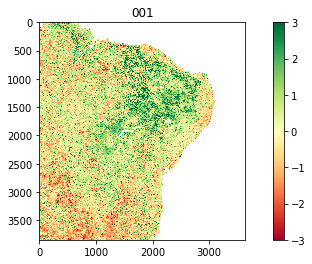

-6.33911 253.614


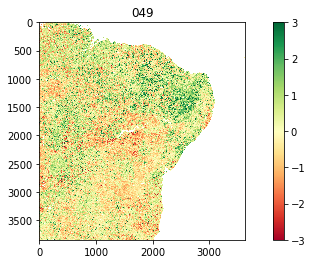

-6.74266 231.575


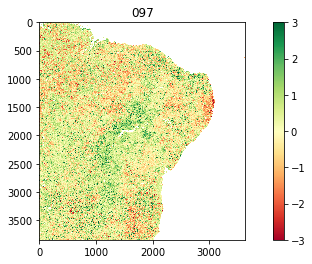

-6.52172 354.968


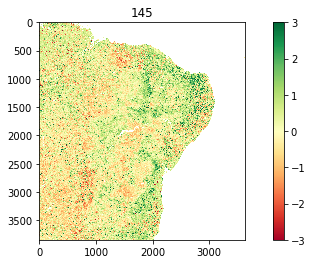

-6.92622 515.209


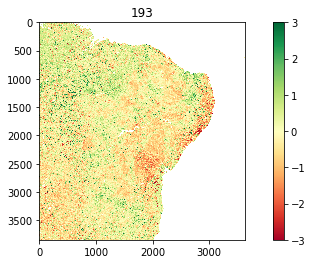

-7.39636 357.089


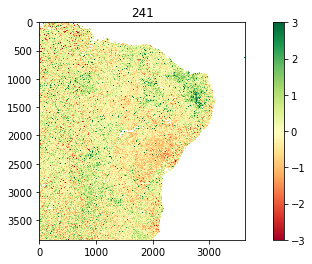

-7.68115 352.139


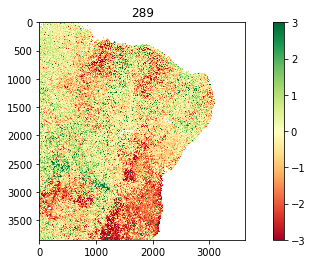

-5.46442 297.592


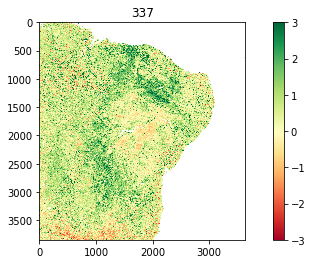

In [38]:
for i in days[::6]:
    a,m = xu.TifToArray(fout+'2011-'+i+'.tif')
    print(np.nanmin(a),np.nanmax(a))
    plt.figure(figsize=(10,4))
    plt.imshow(a)
    plt.title(i)
    plt.clim(-3,3)
    plt.colorbar()
    plt.show()

0.466667 64.55


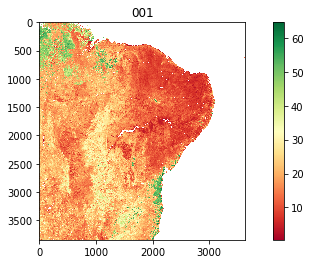

0.516667 64.9667


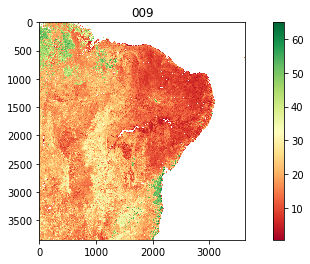

0.583333 64.7833


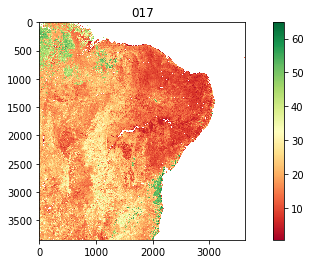

0.5 64.55


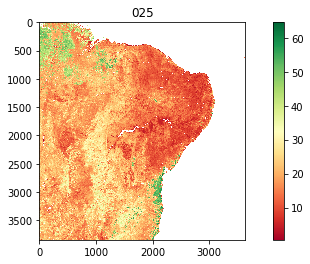

0.516667 64.7833


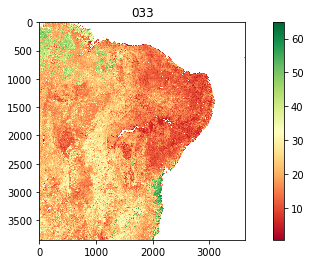

0.533333 64.2167


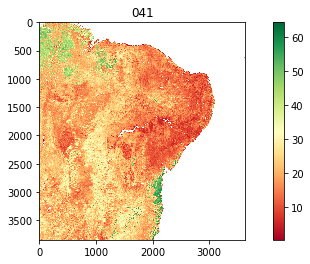

0.55 64.55


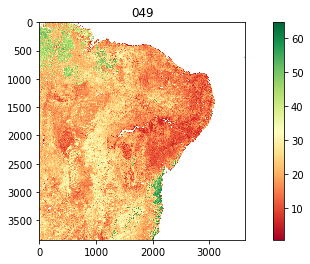

0.677966 64.4237


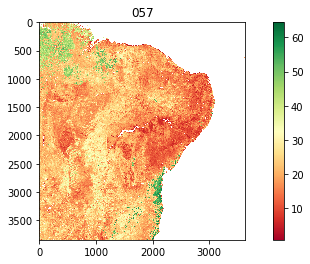

0.724138 64.6724


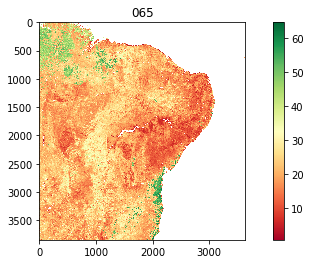

0.684211 64.7018


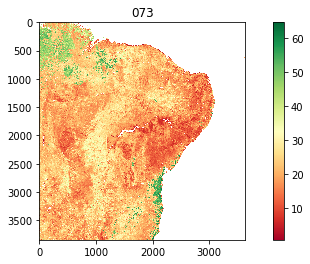

0.714286 64.625


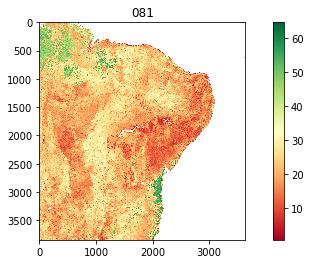

0.660714 64.6786


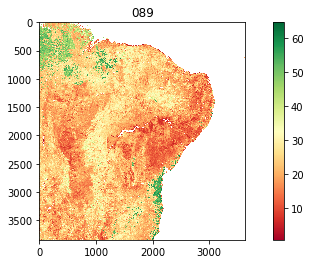

0.732143 64.9107


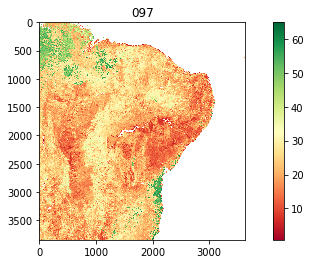

0.696429 65.0893


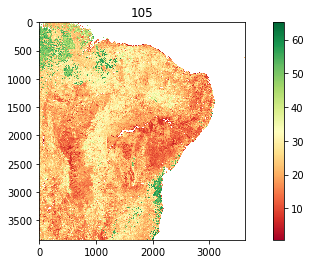

0.625 65.1071


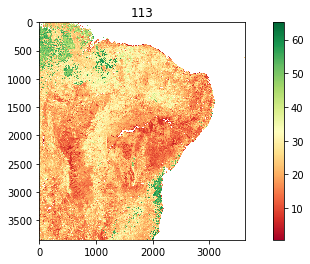

0.553571 64.9286


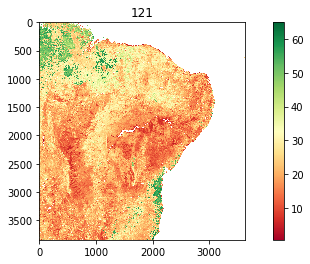

0.517857 65.0536


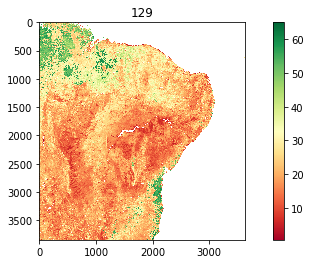

0.642857 64.9821


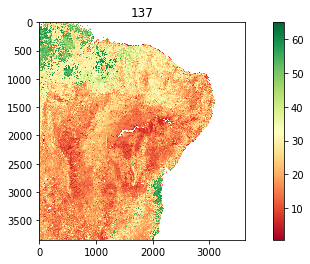

0.625 65.0179


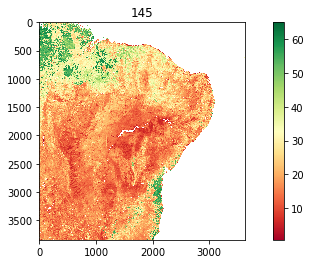

0.625 65.5179


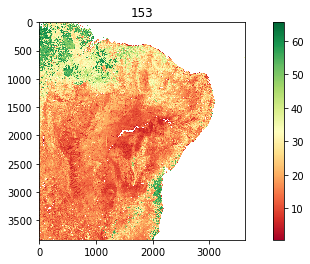

0.660714 65.4464


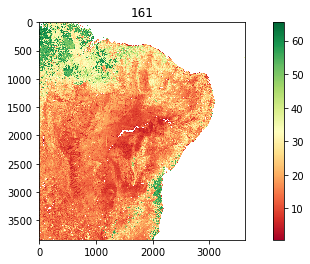

0.428571 65.8393


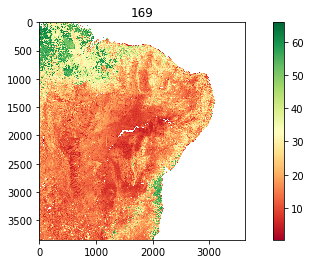

0.428571 66.2321


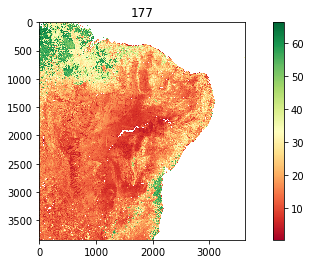

0.410714 66.4643


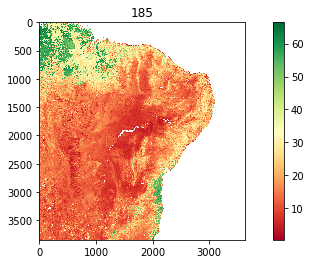

0.350877 67.0175


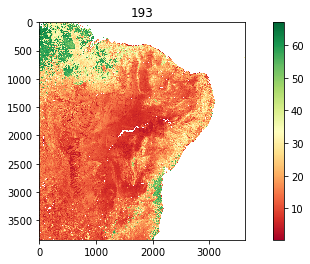

0.327586 66.6552


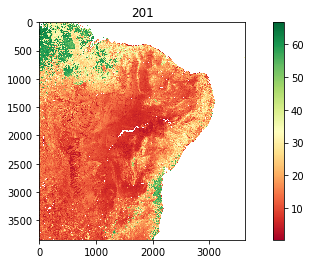

0.322034 66.0


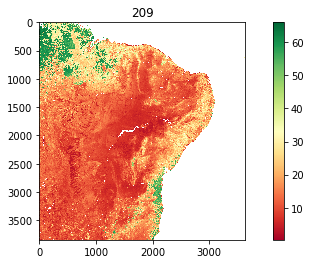

0.25 65.5167


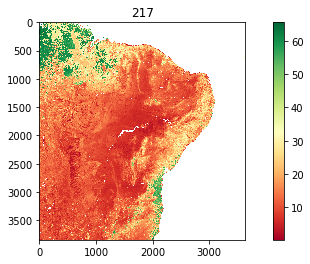

0.216667 65.5833


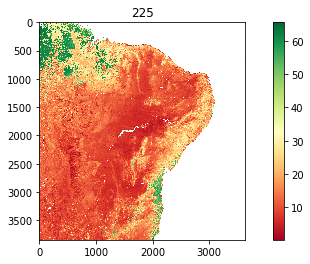

0.3 65.6833


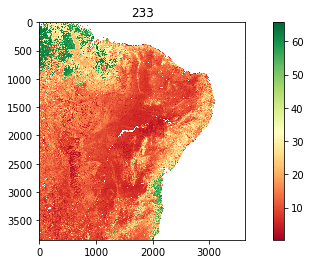

0.366667 65.85


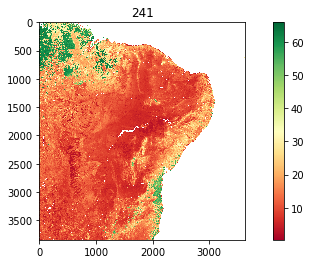

0.45 65.6167


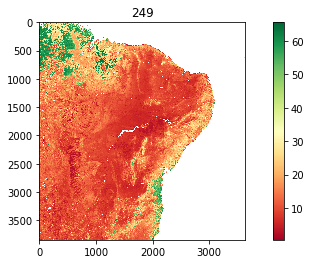

0.45 65.4667


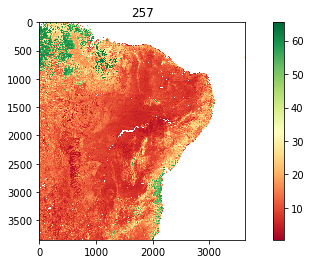

0.466667 65.4667


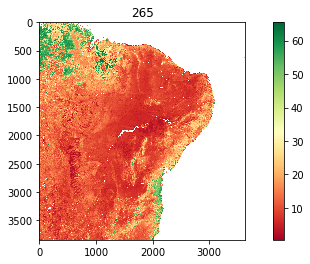

0.5 65.3833


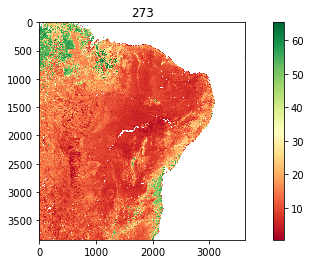

0.533333 65.2333


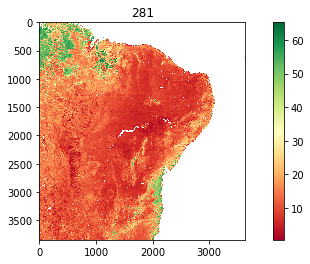

0.45 64.75


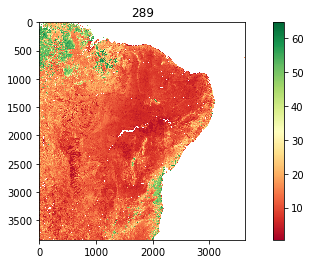

0.466667 64.55


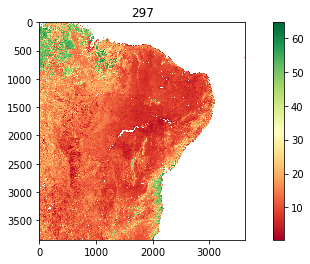

0.45 64.2833


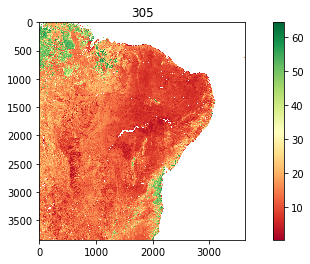

0.433333 64.55


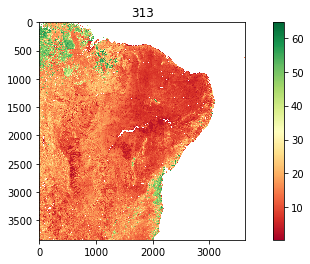

0.45 65.0333


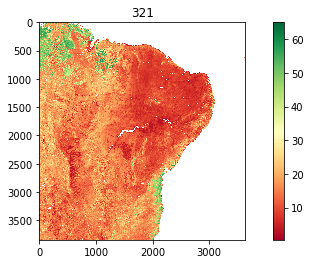

0.416667 65.2333


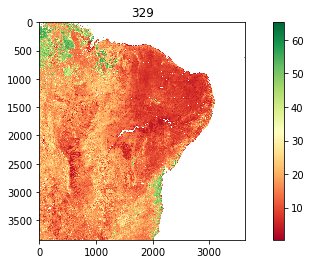

0.416667 64.8833


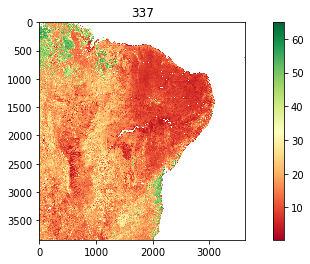

0.383333 64.8667


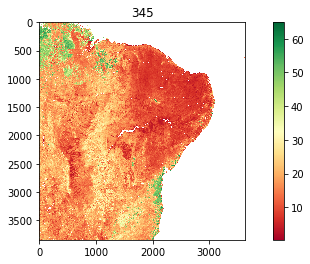

0.383333 65.2167


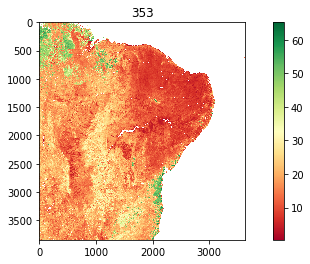

0.45 65.5167


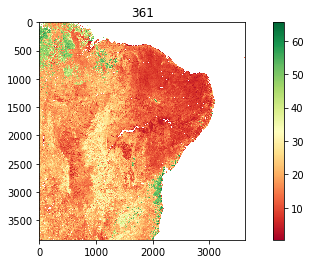

In [36]:
for i in days:
    a,m = xu.TifToArray(fmeans+"/"+i+'.tif')
    print(np.nanmin(a),np.nanmax(a))
    plt.figure(figsize=(10,4))
    plt.imshow(a)
    plt.title(i)
    #plt.clim(-3,3)
    plt.colorbar()
    plt.show()